## Kaggle Speech Audio Data Analysis

Simple analysis of a subset of the data from https://www.kaggle.com/c/tensorflow-speech-recognition-challenge

In [3]:
!pip install librosa

    100% |████████████████████████████████| 1.6MB 4.5MB/s 
    100% |████████████████████████████████| 276kB 11.7MB/s 
    100% |████████████████████████████████| 327kB 9.0MB/s 
    100% |████████████████████████████████| 1.9MB 7.6MB/s 
    100% |████████████████████████████████| 15.9MB 1.3MB/s 
  Running setup.py bdist_wheel for librosa ... - \ | done
  Stored in directory: /content/.cache/pip/wheels/e7/58/3a/820767c35a26cdb7e9d70971454fc6e072524aa4edc934f710
  Running setup.py bdist_wheel for audioread ... - done
  Stored in directory: /content/.cache/pip/wheels/53/02/90/7b5c4081b7470c550ab605f600bad237dde12a6b8999b11f50
  Running setup.py bdist_wheel for resampy ... - \ done
  Stored in directory: /content/.cache/pip/wheels/ff/4f/ed/2e6c676c23efe5394bb40ade50662e90eb46e29b48324c5f9b
Successfully built librosa audioread resampy


In [0]:
%matplotlib inline

#from ipywidgets import interactive
from IPython.display import Audio, display
import numpy as np
from scipy.io import wavfile
import matplotlib.pyplot as plt
import pandas as pd
import librosa as lr
import librosa.display as lrd
from scipy import misc, signal
import pickle

from matplotlib.transforms import Bbox
# from tf_speech import speech

plt.rcParams['figure.figsize'] = (15.0, 3.0)

## Unpickle data

In [21]:
!rm ./short*
!wget https://github.com/gte620v/PracticalDataScience/raw/master/exercises/data/short_wav_data.pkl.gz
!gzip -dkf short_wav_data.pkl.gz
!ls -la

--2018-08-02 17:42:40--  https://github.com/gte620v/PracticalDataScience/raw/master/exercises/data/short_wav_data.pkl.gz
Resolving github.com (github.com)... 192.30.253.112, 192.30.253.113
Connecting to github.com (github.com)|192.30.253.112|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/gte620v/PracticalDataScience/master/exercises/data/short_wav_data.pkl.gz [following]
--2018-08-02 17:42:41--  https://raw.githubusercontent.com/gte620v/PracticalDataScience/master/exercises/data/short_wav_data.pkl.gz
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4238918 (4.0M) [application/octet-stream]
Saving to: ‘short_wav_data.pkl.gz’

short_wav_data.pkl. 100%[===================>]   4.04M  12.3MB/s    in 0.3s

## Load data from Pickle

In [0]:
data = pickle.load(open('short_wav_data.pkl', 'rb'))
df_train = data['df_train'].reset_index(drop=True)
x_test = data['x_test']
y_test = data['y_test']


In [23]:
df_train.head()

,file_path,command,train,wav,wav_ran,label
0,/data/tf_speech/data/train/audio/on/520e8c0e_n...,on,True,"[ 0. -10. -18. ..., 7. 12. 10.]",12390.0,on
1,/data/tf_speech/data/train/audio/zero/0ff728b5...,zero,True,"[ 0. -2. -1. ..., -4. -4. -3.]",26141.0,unknown
2,/data/tf_speech/data/train/audio/bird/9ff2d2f4...,bird,True,"[ 0. 2. 3. ..., 2. 2. 2.]",12721.0,unknown
3,/data/tf_speech/data/train/audio/off/fb7c9b3b_...,off,True,"[-21. -51. -69. ..., -48. 0. 41.]",9985.0,off
4,/data/tf_speech/data/train/audio/up/24632875_n...,up,True,"[-202. -156. -143. ..., 285. 270. 276.]",14777.0,up


## Print value counts by command


In [26]:
# df_train...
df_train.command.value_counts()


sheila     7
tree       7
up         6
on         6
zero       6
silence    5
no         4
down       4
happy      4
go         4
left       4
wow        4
eight      4
six        3
three      3
right      3
bird       3
one        3
off        3
five       3
nine       2
two        2
stop       2
yes        2
four       2
dog        1
bed        1
marvin     1
seven      1
Name: command, dtype: int64

## Play wave for row 10


Play wav file in jupyter.  See http://ipython.org/ipython-doc/2/api/generated/IPython.lib.display.html#IPython.lib.display.Audio for details.

In [51]:
print(df_train.iloc[10,:])
sample_rate = 16000

wav = x_test[10,:].flatten()
Audio(wav, autoplay=True, rate=sample_rate) 
    
 
# Audio(...

file_path    /data/tf_speech/data/train/audio/happy/93f30cc...
command                                                  happy
train                                                     True
wav                 [  92.  130.  133. ...,   71.   84.   99.]
wav_ran                                                  20946
label                                                  unknown
Name: 10, dtype: object


## Plot time domain waveform for row 10

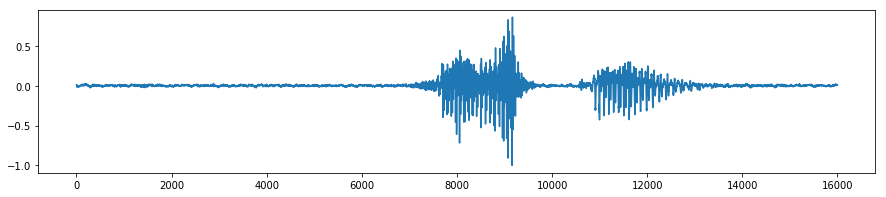

In [49]:
# plt.plot(...
plt.plot(wav)

## Plot spectrogram for row 10

See https://matplotlib.org/api/_as_gen/matplotlib.pyplot.specgram.html.

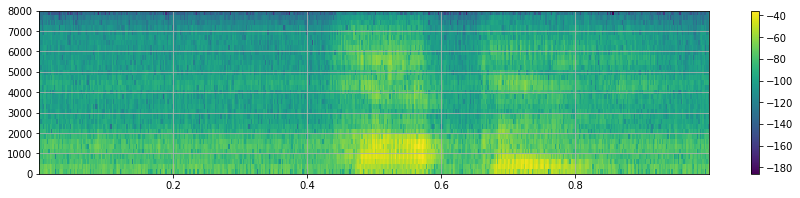

In [57]:
# plt.specgram(...

plt.specgram(wav, NFFT=64, noverlap=32,Fs=sample_rate,
            );
plt.grid()
plt.colorbar()

## Make function to play sound and show plots

In [0]:
def show_a_sample(row, x_test):
    """Present a wav file sample.  
    
    Function should 
      - print row parameters
      - play sound
      - show time domain wav
      - show spectrogram wav
    
    Args:
        row: pandas dataframe row
        x_test: numpy array of all wavs
        
    Returns:
        wav: 1D array wav file
    
    """
    sample_rate = 16000
    wav = x_test[row.Index,:].flatten()
    
    # insert code here

    return wav

wav = show_a_sample(list(df_train.itertuples())[0], x_test)

## Loop through all "tree" commands



In [0]:
# for row in df_train[...:
#     wav = show_a_sample(...